<a href="https://colab.research.google.com/github/i1in/player/blob/main/z1_u.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import random
import numpy as np

# Задача: Обучить нейронную сеть на датасете MNIST для классификации рукописных цифр (0-9)
# Входные данные: Наборы изображений цифр (размером 28x28 пикселей), представленные в виде матриц. 60000
# На выходе мы ожидаем:
# Высокую точность классификации на тестовом наборе данных
# Графики обучения (точность и функция потерь)

random.seed(0)  # Устанавливаем фиксированный seed для модуля random для воспроизводимости результатов
np.random.seed(0)  # Устанавливаем фиксированный seed для модуля numpy для воспроизводимости
torch.manual_seed(0)  # Фиксируем seed для модуля torch для CPU
torch.cuda.manual_seed(0)  # Фиксируем seed для модуля torch для GPU (если используется)
# Гарантирует детерминированное поведение во время обучения, чтобы результаты были воспроизводимыми
torch.backends.cudnn.deterministic = True

In [ ]:
import torchvision.datasets  # Подключаем модуль для работы с популярными датасетами
# download указывает, нужно ли загружать MNIST из интернета, если он ещё не существует
# train указывает, какую часть данных загружать — тренировочную или тестовую
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)  # Загружаем тренировочный набор данных MNIST
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)  # Загружаем тестовый набор данных MNIST

# тренировочный набор данных содержит 60,000 изображений
# тестовый набор данных содержит 10,000 изображений

X_train = MNIST_train.train_data  # картинки
print("X_train:", X_train)
y_train = MNIST_train.train_labels  # лейблы
print("y_train:", y_train)
X_test = MNIST_test.test_data  # Извлекаем изображения из тестового набора
y_test = MNIST_test.test_labels  # Извлекаем метки классов из тестового набора

# Это одномерный тензор, и поэтому мы обозначили X_train с большой буквы, а y_train - с маленькой, предполагая,
# что X_train - это многомерный тензор, y - это одномерный (поэтому с маленькой)

print(X_train.dtype, y_train.dtype)

X_train = X_train.float()  # переводим данные в дробные числа
X_test = X_test.float()

# Почему мы это делаем? Потому что наша нейронная сеть работает с дробными числами
# Например, градиенты вычисляются как малые дробные значения
# Также функция активации (сигмоида, ReLU) и функция потерь (MSE, Cross-Entropy) используют вход дробных чисел
# И как пример Linear (класс, реализующй полносвязный слой) ожидает так же на вход дробное число
# Оптимизаторы (Adam, SGD) работают с float-градиентами

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

# Что мы здесь имеем? 3 оси
# Многомерные тензоры (X), которые хранят в себе 60000 тренировочных и 10000 тестовых изобр., каждое 28х28 пикселей (784 в целом)
# Одномерные тензоры (y), которые хранят в себе 60000 меток (цифр от 0 до 9) и 10000 меток для тренир. и тест. данных

X_train: tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
   

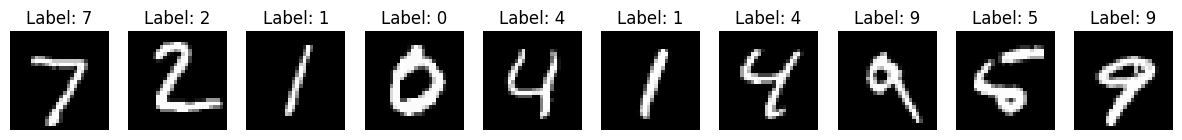

In [ ]:
# Пример данных датасета (в нашем случае наборов изображений матриц, представленных в виде матриц)
import matplotlib.pyplot as plt

n = 10  # Сколько примеров показать
fig, axes = plt.subplots(1, n, figsize=(15, 15))

for i in range(n):
    axes[i].imshow(MNIST_test.data[i], cmap='gray')
    axes[i].set_title(f"Label: {MNIST_test.targets[i]}")
    axes[i].axis('off')

plt.show()

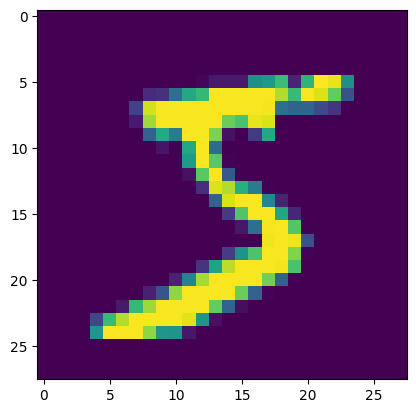

tensor(0)


In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[1])  # Выводим метку класса для второго изображения

In [ ]:
# Здесь 2D изображения (28x28) превращаются в векторы длиной 28×28=784
# Это необходимо, потому что первый слой нейронной сети принимает вектор входных данных

print(X_train)

X_train = X_train.reshape([-1, 28 * 28])  # reshape растягивает картинки в один длинный вектор
X_test = X_test.reshape([-1, 28 * 28])  # каждый пиксель найдёт своё место в этом длинном векторе

# -1 означает автоматическое вычисление размера по этому измерению

print(X_train)

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

In [ ]:
class MNISTNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)  # (fully connected 1) вход 784 пикселя
        self.ac1 = torch.nn.Sigmoid()  # сигмоидная активация, чтобы добавить нелинейность
        # Почему sigmoid?
        # Есть диапазон выхода от 0 до 1 (вероятность(например принадлежность к классу))
        # Нелинейность для обучения сложным паттернам
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10)  # на выходе 10 (потому, что у нас 10 классов): это цифры от 0 до 9
        # То есть у нас классификация на 10 классов.

    def forward(self, x):
        x = self.fc1(x)  # Применяем первый полносвязный слой
        x = self.ac1(x)  # Применяем сигмоидную функцию активации
        x = self.fc2(x)  # Применяем второй полносвязный слой
        return x  # Возвращаем результат в виде тензора, равном 10


mnist_net = MNISTNet(100)  # Создаем экземпляр нейронной сети с 100 скрытыми нейронами

print(torch.cuda.is_available())

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')  # Выбираем устройство: GPU, если доступно, иначе CPU
mnist_net = mnist_net.to(device)  # Переносим модель на выбранное устройство
print(list(mnist_net.parameters()))  # Выводим список параметров модели

False
[Parameter containing:
tensor([[-0.0003,  0.0192, -0.0294,  ...,  0.0219,  0.0037,  0.0021],
        [-0.0198, -0.0150, -0.0104,  ..., -0.0203, -0.0060, -0.0299],
        [-0.0201,  0.0149, -0.0333,  ..., -0.0203,  0.0012,  0.0080],
        ...,
        [ 0.0221,  0.0258, -0.0088,  ..., -0.0141,  0.0051, -0.0318],
        [-0.0217, -0.0136,  0.0185,  ..., -0.0012, -0.0012, -0.0017],
        [ 0.0142,  0.0089, -0.0053,  ...,  0.0311, -0.0181,  0.0020]],
       requires_grad=True), Parameter containing:
tensor([-3.5402e-02,  1.8178e-02, -2.1709e-02, -1.1839e-02,  4.8722e-03,
        -1.0492e-02, -1.9008e-02,  2.6994e-02, -3.4899e-02,  1.0381e-02,
        -3.5228e-02, -5.6381e-03, -2.0134e-02, -3.0264e-02, -1.3289e-02,
         2.5346e-02, -1.0797e-02,  2.1568e-03,  4.3630e-03, -2.1916e-02,
         2.2670e-02, -1.5766e-02,  3.4906e-02, -2.3063e-02, -6.8216e-03,
         2.7051e-02, -1.3991e-02,  9.7218e-03, -9.9075e-04,  1.6625e-03,
         2.3455e-02, -2.5294e-02,  4.8024e-06, -2

In [ ]:
# Используется для задач классификации, минимизирует расхождение между истинными метками и предсказанным распределением вероятностей, Совместима с softmax
loss = torch.nn.CrossEntropyLoss()  # Определяем функцию потерь для задачи классификации.
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)  # Создаем оптимизатор Adam с заданным шагом обучения.

batch_size = 1000

test_accuracy_history = []  # список для хранения точности на тестовом наборе
test_loss_history = []  # список для хранения значений функции потерь на тестовом наборе

# X_test.to(device) — передается заранее, так как данные тестового набора остаются неизменными в процессе обучения,
# и их нужно передавать на устройство только один раз
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(40):
    order = np.random.permutation(len(X_train))  # Перемешиваем индексы тренировочных данных.

    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index + batch_size]

        # Передача на GPU требуется, потому что PyTorch операции выполняются на устройстве, где находятся данные и модель.
        # передаем мини-батч на устройство во время каждой итерации обучения.
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)

        preds = mnist_net.forward(X_batch)  # Получаем предсказания модели.

        loss_value = loss(preds, y_batch)
        loss_value.backward()

        optimizer.step()

    test_preds = mnist_net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test))

    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)
    print(epoch, accuracy)

0 tensor(0.8885)
1 tensor(0.9127)
2 tensor(0.9211)
3 tensor(0.9248)
4 tensor(0.9286)
5 tensor(0.9326)
6 tensor(0.9359)
7 tensor(0.9382)
8 tensor(0.9414)
9 tensor(0.9408)
10 tensor(0.9452)
11 tensor(0.9426)
12 tensor(0.9464)
13 tensor(0.9461)
14 tensor(0.9480)
15 tensor(0.9476)
16 tensor(0.9501)
17 tensor(0.9528)
18 tensor(0.9494)
19 tensor(0.9514)
20 tensor(0.9515)
21 tensor(0.9532)
22 tensor(0.9527)
23 tensor(0.9524)
24 tensor(0.9540)
25 tensor(0.9554)
26 tensor(0.9550)
27 tensor(0.9580)
28 tensor(0.9550)
29 tensor(0.9551)
30 tensor(0.9570)
31 tensor(0.9572)
32 tensor(0.9563)
33 tensor(0.9579)
34 tensor(0.9577)
35 tensor(0.9579)
36 tensor(0.9590)
37 tensor(0.9569)
38 tensor(0.9607)
39 tensor(0.9592)


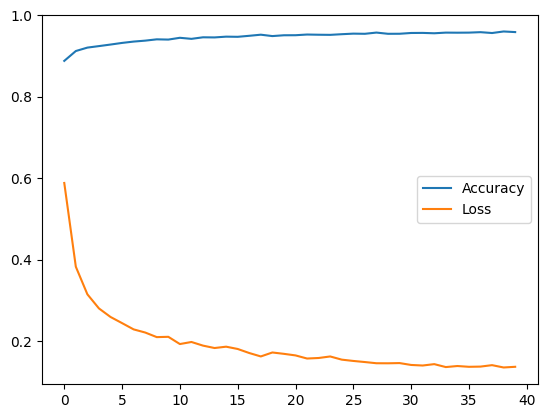

In [ ]:
test_accuracy_history = [acc.cpu().numpy() for acc in test_accuracy_history]
test_loss_history = [loss.detach().cpu().numpy() for loss in test_loss_history]

# Построение графиков
plt.plot(test_accuracy_history, label='Accuracy')
plt.plot(test_loss_history, label='Loss')
plt.legend()
plt.show()

# На графике и по значениям видно, что точность достигает около 96% (0.96), и график функции потерь стабилизируется
#
# Признаков переобучения нет, так как:
# Потери на тестовом наборе не начинают резко увеличиваться после определенного количества эпох
# Точность не снижается, а наоборот стабилизируется